In [1]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

def plot_2pc_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,1]
        ydata = list_traj[i][:,2]
        zdata = list_traj[i][:,3]
        if i%2 == 0:
            ax.scatter3D(xdata, ydata, zdata, c='g')
        else:
            ax.scatter3D(xdata, ydata, zdata, c='r')
    plt.show()
    
def plot_3pc_traj(list_traj):
    N = len(list_traj)/3
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,0]
        ydata = list_traj[i][:,1]
        zdata = list_traj[i][:,2]
        if i < 2*N:
            if i%2 == 0:
                ax.scatter3D(xdata, ydata, zdata, c='g')
            else:
                ax.scatter3D(xdata, ydata, zdata, c='r')
        else:
            ax.scatter3D(xdata, ydata, zdata, c='b')
    plt.show()

R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

In [2]:
def torus_wind(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = torus_point(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj


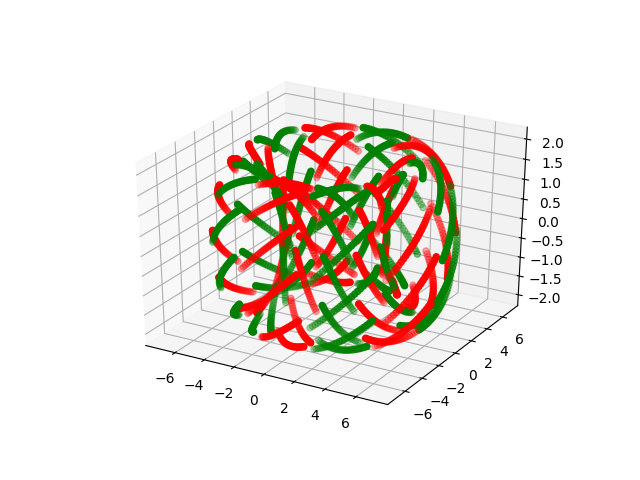

|███████████████████████████████▎        | ▃▁▃ 3938/5050 [78%] in 3:05 (21.(23.1/s, ▆█▆ 128/5050 [3%] in 6s (23.2/s, (23.5/s, ▇▅▃ 215/5050 [4%] in 9s (23.7/s,▃▅▇ 400/5050 [8%] in 16s (24.4/s ▄▆█ 440/5050 [9%] in 18s (24.4/s in 21s (24.4/ ▇▇▅ 522/5050 [10%] in 21s (24.4/in 22s (24.3/543/5050 [11%] in 22s (24.3/557/5050 [11%] in 23s (24.2/(24.3/▆█▆ 635/5050 [13%] in 26s (24.3/ (24.3/(24.2/ ▄▆█ 741/5050 [15%] in 31s (24.2/ (24.2/ (24.2/777/5050 [15%] in 32s (24.3/(24.3/(24.2/1027/5050 [20%] in 43s (24.1 (24.1(24.11068/5050 [21%] in 44s (24.1 (24.11093/5050 [22%] in 46s (24.0 in 46s (24.0 1128/5050 [22%] in 47s (23.91138/5050 [23%] in 48s (23.8(23.81166/5050 [23%] in 49s (23.7▄▆█ 1180/5050 [23%] in 50s (23.7 in 51s (23.71352/5050 [27%] in 57s (23.7 (23.7in 58s (23.7 █▆▄ 1395/5050 [28%] in 59s (23.7 1399/5050 [28%] in 59s (23.71403/5050 [28%] in 59s (23.7in 59s (23.71428/5050 [28%] in 1:00 (23. ▅▇▇ 1431/5050 [28%] in 1:00 (23.▇▅▃ 1442/5050 [29%] in 1:01 (23. ▃▅▇ 1508/5050 [30%] in 1:04 (23.

In [ ]:
t2s = Traj2Sim()
list_traj = []


N=10
length=25

for i in range(N):
    for j in range(N):
        list_traj.append(torus_wind(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=length-1))
        
plot_2pc_traj(list_traj)

t2s.set_trajectories(list_traj)
t2s.dist = 'mssd'
t2s.compute_mssd(verbose=False)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])


In [ ]:
verbose=False
for i in range(len(t2s.trajectories)):
    for j in range(i+1, len(t2s.trajectories)):
        #self.MSSD[i][j-i-1].set_trajectories(self.trajectories[i], self.trajectories[j])
        #t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].inf_metric()
        t2s.dist_mat[i,j] = t2s.MSSD[i][j-i-1].t_thresh_metric(t_thresh=25)
        t2s.dist_mat[j,i] = t2s.dist_mat[i,j]
        if verbose == True:
            print('Custom distance between ' + str(i) + ', ' + str(j) + ': ' + str(t2s.dist_mat[i,j]))
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=-0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_diagram(pers[:20])

